In [1]:
!pip install qiskit qiskit_aer
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.6 MB/s eta 0:00:00


In [2]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=80f10fd23cd4e88d1b5d96d61487b28a34b297ddff274d1ff47798d3f0f5fe0c
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [3]:
from google.colab import userdata
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session, Options

In [4]:
# Bernstein–Vazirani Algorithm using Qiskit 2.x
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bv_oracle(qc, inputs, ancilla, s):
    """Implements oracle for f(x) = s · x (no constant b)."""
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

def bernstein_vazirani_circuit(s):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    bv_oracle(qc, inputs, ancilla, s)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, list(reversed(creg)))
    return qc

def run_bv(qc, shots=1024):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print('Counts:', counts)
    fig = plot_histogram(counts)
    plt.show()
    most = max(counts, key=counts.get)
    print('Most frequent measured bitstring (input register):', most)
    return most

if __name__ == '__main__':
    s = '1011'
    print('Secret string s =', s)
    qc = bernstein_vazirani_circuit(s)
    print(qc.draw(fold=-1))
    measured = run_bv(qc)
    if measured == s:
        print('✅ Successfully recovered secret string s')
    else:
        print('⚠️ Measured string differs from s (noise or error).')


Secret string s = 1011
     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      2             3       1  0 
Counts: {'1011': 1024}
Most frequent measured bitstring (input register): 1011
✅ Successfully recovered secret string s


# ***TASK 1***

In [5]:
s_task1 = '01101'
n_task1 = len(s_task1)

print(f"--- Task 1: Testing with new secret s = {s_task1} ---")

# 1. Create the circuit
qc_task1 = bernstein_vazirani_circuit(s_task1)
print(f"Circuit for s = {s_task1}:")
print(qc_task1.draw(fold=-1))

# 2. Run the simulation
measured_task1 = run_bv(qc_task1)

# 3. Verify
if measured_task1 == s_task1:
    print(f"✅ Successfully recovered secret string s = {s_task1}")
else:
    print(f"⚠️ Measured string {measured_task1} differs from s = {s_task1}")

--- Task 1: Testing with new secret s = 01101 ---
Circuit for s = 01101:
     ┌───┐┌───┐     ┌─┐                             
q_0: ┤ H ├┤ H ├─────┤M├─────────────────────────────
     ├───┤└───┘     └╥┘┌───┐          ┌─┐           
q_1: ┤ H ├───────■───╫─┤ H ├──────────┤M├───────────
     ├───┤       │   ║ └───┘     ┌───┐└╥┘     ┌─┐   
q_2: ┤ H ├───────┼───╫────────■──┤ H ├─╫──────┤M├───
     ├───┤┌───┐  │   ║  ┌─┐   │  └───┘ ║      └╥┘   
q_3: ┤ H ├┤ H ├──┼───╫──┤M├───┼────────╫───────╫────
     ├───┤└───┘  │   ║  └╥┘   │        ║ ┌───┐ ║ ┌─┐
q_4: ┤ H ├───────┼───╫───╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐ ║   ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_5: ┤ X ├┤ H ├┤ X ├─╫───╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘ ║   ║  └───┘└───┘ ║       ║  ║ 
c: 5/════════════════╩═══╩═════════════╩═══════╩══╩═
                     4   1             3       2  0 
Counts: {'01101': 1024}
Most frequent measured bitstring (input register): 01101
✅ Successfully recovered secret string s = 01101


# ***TASK 2***

In [6]:
# --- Task 2: Implement f(x) = s·x ⊕ b ---
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# 1. New oracle function that includes 'b'
def bv_oracle_with_b(qc, inputs, ancilla, s, b):
    """Implements oracle for f(x) = s · x ⊕ b."""
    # Apply s·x part
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

    # Apply ⊕ b part
    if b == '1':
        qc.x(ancilla) # Flip ancilla if b=1

# 2. New circuit builder that accepts 'b'
#    We also add a classical bit to measure the ancilla
def bv_circuit_with_b(s, b):
    n = len(s)
    # n input qubits, 1 ancilla qubit
    qreg_task2 = QuantumRegister(n + 1, 'q')
    # n classical bits for input, 1 for ancilla
    creg_task2 = ClassicalRegister(n + 1, 'c')
    qc_task2 = QuantumCircuit(qreg_task2, creg_task2)

    inputs = list(range(n))
    ancilla = n

    # Initialize ancilla to |->
    qc_task2.x(ancilla)
    qc_task2.h(qreg_task2) # Apply H to all qubits

    qc_task2.barrier()

    # Apply oracle
    bv_oracle_with_b(qc_task2, inputs, ancilla, s, b)

    qc_task2.barrier()

    # Apply H to input qubits
    for q in inputs:
        qc_task2.h(q)

    # Measure inputs AND ancilla
    input_creg_indices = list(range(n))

    # Map inputs [q_0, ..., q_{n-1}] to [c_{n-1}, ..., c_0]
    qc_task2.measure(inputs, list(reversed(input_creg_indices)))

    # Map the ancilla qubit (q_n) to the last classical bit (c_n)
    qc_task2.measure(ancilla, n)

    return qc_task2

# 3. New runner function to print results
def run_bv_task2(qc, s, b, shots=1024):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()

    print(f"\n--- Running for s='{s}', b='{b}' ---")
    # Clarified the label: Leftmost bit is ancilla
    print('Counts (ancilla + input):', counts)

    # --- THIS IS THE FIX ---
    # We check for the string '(ancilla_bit)' + s

    # Check for '0' (ancilla) + s (input)
    s_count_0 = counts.get('0' + s, 0)
    # Check for '1' (ancilla) + s (input)
    s_count_1 = counts.get('1' + s, 0)
    # --- END FIX ---

    total_s_count = s_count_0 + s_count_1

    print(f"Total measurements recovering s='{s}': {total_s_count}/{shots}")
    print(f"Ancilla measured '0' (with s='{s}'): {s_count_0}")
    print(f"Ancilla measured '1' (with s='{s}'): {s_count_1}")

    if total_s_count / shots > 0.95: # Allow for simulation noise
        print(f"✅ Successfully recovered s='{s}' regardless of b.")
    else:
        print(f"⚠️ Failed to recover s='{s}'.")

    print(f"Note: The ancilla bit is ~50/50, as expected, "
          "showing 'b' does not affect the outcome.")

    fig = plot_histogram(counts,
                         title=f"BV with s='{s}', b='{b}' (Leftmost bit is ancilla)")
    plt.show()

# 4. Run tests
s_task2 = '110'

# Test with b = '0'
qc_b0 = bv_circuit_with_b(s_task2, '0')
print(qc_b0.draw(fold=-1))
run_bv_task2(qc_b0, s_task2, '0')

# Test with b = '1'
qc_b1 = bv_circuit_with_b(s_task2, '1')
print(qc_b1.draw(fold=-1))
run_bv_task2(qc_b1, s_task2, '1')

     ┌───┐      ░            ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░───■────────░─┤ H ├┤M├──────
     ├───┤      ░   │        ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■───░─┤ H ├─╫─┤M├───
     ├───┤      ░   │    │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼────┼───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └┬─┬┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░──┤M├──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░  └╥┘  ║  ║  ║ 
c: 4/════════════════════════════╩═══╩══╩══╩═
                                 3   2  1  0 

--- Running for s='110', b='0' ---
Counts (ancilla + input): {'1110': 515, '0110': 509}
Total measurements recovering s='110': 1024/1024
Ancilla measured '0' (with s='110'): 509
Ancilla measured '1' (with s='110'): 515
✅ Successfully recovered s='110' regardless of b.
Note: The ancilla bit is ~50/50, as expected, showing 'b' does not affect the outcome.
     ┌───┐      ░                 ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░───■─────────────░─┤ H ├┤M├──────
     ├───┤      ░   │             ░

# ***TASK 3***



In [15]:
# --- Task 3: Run on Simulator vs. Real Backend (Final Version) ---
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# (Assuming bv_oracle function is defined)

# 1. Circuit builder WITHOUT measurements (This is correct)
def bv_circuit_no_measure(s):
    n = len(s)
    qreg_task3 = QuantumRegister(n + 1, 'q')
    qc_task3 = QuantumCircuit(qreg_task3)
    inputs = list(range(n))
    ancilla = n
    qc_task3.x(ancilla)
    qc_task3.h(qreg_task3)
    bv_oracle(qc_task3, inputs, ancilla, s)
    for q in inputs:
        qc_task3.h(q)
    return qc_task3

# --- Main execution for Task 3 ---
s_task3 = '101'
n_task3 = len(s_task3)
qc_no_measure = bv_circuit_no_measure(s_task3)

print(f"--- Task 3: Running s = {s_task3} on Simulator vs. Real Backend ---")

# 2. Run on local AerSimulator (for comparison)
print("\nRunning on AerSimulator...")
aer_sim_backend = Aer.get_backend('aer_simulator')
sampler_aer = Sampler(mode=aer_sim_backend)

qc_aer = qc_no_measure.copy()
qc_aer.add_register(ClassicalRegister(n_task3, 'c_aer'))
qc_aer.measure(list(range(n_task3)), list(reversed(range(n_task3))))

tqc_aer = transpile(qc_aer, aer_sim_backend)
job_aer = sampler_aer.run([tqc_aer], shots=1024)
result_aer = job_aer.result()

counts_aer = result_aer[0].data.c_aer.get_counts()

print(f"AerSimulator Counts: {counts_aer}")
print("✅ Local AerSimulator run successful.")
plot_histogram(counts_aer, title="AerSimulator Results")
plt.show()


# 3. Run on IBM Backend
print("\nRunning on IBM Backend...")

# --- NOTE ---
# The entire try...except block below is commented out.
# Based on our debugging, the 'open-instance' plan has no access
# to cloud simulators and its hardware backends have a transpiler bug.
print("⚠️ Skipping IBM Backend run.")
print("   Reason: Available 'open-instance' backends have a known transpiler bug,")
print("   and no cloud simulators are available in this instance.")

try:
    my_token = userdata.get('IBM_API_KEY')

    service = QiskitRuntimeService(
        channel="ibm_quantum_platform",
        token=my_token
    )

    print("Finding a suitable backend (and avoiding 'ibm_fez', 'ibm_torino', 'ibm_marrakesh')...")
    all_backends = service.backends(simulator=False)

    suitable_backends = []
    KNOWN_BAD_BACKENDS = ['ibm_fez', 'ibm_torino', 'ibm_marrakesh']

    for b in all_backends:
        status = b.status()
        if (status.operational and
            b.num_qubits >= (n_task3 + 1) and
            b.name not in KNOWN_BAD_BACKENDS):
            suitable_backends.append(b)

    if not suitable_backends:
        print(f"❌ Error: No other suitable backends were found besides {KNOWN_BAD_BACKENDS}.")
        print("Please try again later or check your account.")
        raise RuntimeError("No suitable backends available.")

    backend = sorted(suitable_backends, key=lambda b: b.status().pending_jobs)[0]

    print(f"Using backend: {backend.name}")

    sampler_real = Sampler(mode=backend)

    print(f"Transpiling circuit for {backend.name} using its 'target'...")
    transpiled_circuit = transpile(qc_no_measure, target=backend.target, optimization_level=1)

    transpiled_circuit.add_register(ClassicalRegister(n_task3, 'c_real'))
    transpiled_circuit.measure(
        list(range(n_task3)), list(reversed(range(n_task3)))
    )

    print("Running job on real hardware...")
    job_real = sampler_real.run([transpiled_circuit], shots=1024)
    print(f"Job ID: {job_real.job_id()}")
    result_real = job_real.result()

    counts_real = result_real[0].data.c_real.get_counts()

    print(f"Real Backend Counts: {counts_real}")
    plot_histogram(counts_real, title=f"{backend.name} Results")
    plt.show()

except Exception as e:
    print(f"Could not run on real backend: {e}")
    print("Please ensure you have qiskit_ibm_runtime installed and your account saved.")

--- Task 3: Running s = 101 on Simulator vs. Real Backend ---

Running on AerSimulator...
AerSimulator Counts: {'101': 1024}
✅ Local AerSimulator run successful.

Running on IBM Backend...
⚠️ Skipping IBM Backend run.
   Reason: Available 'open-instance' backends have a known transpiler bug,
   and no cloud simulators are available in this instance.


qiskit_runtime_service._discover_account:WARNING:2025-11-05 16:09:10,149: Loading account with the given token. A saved account will not be used.
qiskit_runtime_service.__init__:WARNING:2025-11-05 16:09:12,807: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-11-05 16:09:12,812: Loading instance: open-instance, plan: open


Finding a suitable backend (and avoiding 'ibm_fez', 'ibm_torino', 'ibm_marrakesh')...
❌ Error: No other suitable backends were found besides ['ibm_fez', 'ibm_torino', 'ibm_marrakesh'].
Please try again later or check your account.
Could not run on real backend: No suitable backends available.
Please ensure you have qiskit_ibm_runtime installed and your account saved.


# ***TASK 4***

In [8]:
# --- Task 4: Add Noise Model ---
from qiskit_aer.noise import NoiseModel, depolarizing_error

# (Assuming bernstein_vazirani_circuit is defined)

# 1. Create a noise model
noise_model_task4 = NoiseModel()

# Add depolarizing error to single-qubit gates (H, X)
# 1% error (0.01)
error_1 = depolarizing_error(0.01, 1)
noise_model_task4.add_all_qubit_quantum_error(error_1, ['h', 'x'])

# Add depolarizing error to two-qubit gates (CX)
# 5% error (0.05)
error_2 = depolarizing_error(0.05, 2)
noise_model_task4.add_all_qubit_quantum_error(error_2, ['cx'])

print("Created noise model:")
print(noise_model_task4)

# 2. Create a new runner function that uses the noise model
def run_bv_noisy(qc, noise_model, shots=1024):
    # Create AerSimulator WITH the noise model
    sim_noise = AerSimulator(noise_model=noise_model)

    # Transpile the circuit for the noisy simulator
    tqc_noise = transpile(qc, sim_noise)

    # Run the job
    job_noise = sim_noise.run(tqc_noise, shots=shots)
    result_noise = job_noise.result()
    counts_noise = result_noise.get_counts()

    print('Noisy Counts:', counts_noise)
    fig = plot_histogram(counts_noise, title="Noisy Simulation")
    plt.show()

    most = max(counts_noise, key=counts_noise.get)
    print('Most frequent measured bitstring:', most)
    return most

# 3. Run the test
s_task4 = '1011'
qc_task4 = bernstein_vazirani_circuit(s_task4)

print(f"\n--- Task 4: Running with s = {s_task4} and Noise Model ---")
measured_noisy = run_bv_noisy(qc_task4, noise_model_task4)

if measured_noisy == s_task4:
    print(f"✅ Successfully recovered s = {s_task4} (it was the most frequent).")
else:
    print(f"⚠️ Measured string {measured_noisy} differs from s = {s_task4}.")

Created noise model:
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'h', 'cx']
  All-qubits errors: ['h', 'x', 'cx']

--- Task 4: Running with s = 1011 and Noise Model ---
Noisy Counts: {'0001': 2, '0000': 26, '1010': 51, '1000': 21, '1001': 25, '0011': 19, '1011': 880}
Most frequent measured bitstring: 1011
✅ Successfully recovered s = 1011 (it was the most frequent).


# ***TASK 5***

# 📓 Bernstein-Vazirani Algorithm with Qiskit

This notebook demonstrates the Bernstein-Vazirani (BV) algorithm, a quantum algorithm that provides a speedup over the best classical solution.

**The Problem:**
Imagine a "black box" function $f$ that takes an $n$-bit string $x$ and returns a single bit (0 or 1). We are promised that this function computes the bitwise dot product of $x$ with a secret $n$-bit string $s$, modulo 2.

$$f(x) = s \cdot x \pmod{2}$$

Where $s \cdot x = s_0 x_0 \oplus s_1 x_1 \oplus \dots \oplus s_{n-1} x_{n-1}$ (and $\oplus$ is XOR).

**Goal:** Find the secret string $s$.

* **Classically:** To find $s$ (e.g., $s = '101'$), you must query the function $n$ times.
    * $f('100') = s_0 = 1$
    * $f('010') = s_1 = 0$
    * $f('001') = s_2 = 1$
    * This reveals $s$ one bit at a time.
* **Quantumly:** The Bernstein-Vazirani algorithm can find $s$ with **only one** query to the function.

---

### Step 1: Imports and Setup

First, we import the necessary libraries from Qiskit. We'll use `qiskit_aer` for simulation.

In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_circuit_layout
import matplotlib.pyplot as plt

### Step 2: The Quantum Oracle

The "black box" or "oracle" is the quantum implementation of $f(x)$. The BV algorithm uses an $(n+1)$-qubit circuit: $n$ qubits for the input $x$ and one "ancilla" qubit.

The oracle $U_f$ performs the mapping: $|x\rangle|y\rangle \rightarrow |x\rangle|y \oplus f(x)\rangle$.

For $f(x) = s \cdot x$, this is implemented by applying a CNOT gate from input qubit $i$ to the ancilla *only if* the corresponding secret bit $s_i$ is '1'.

In [10]:
def bv_oracle(qc, inputs, ancilla, s):
    """Implements oracle for f(x) = s · x."""
    # qc: The QuantumCircuit object
    # inputs: List of input qubit indices
    # ancilla: The ancilla qubit index
    # s: The secret bitstring

    n = len(s)
    for i in range(n):
        if s[i] == '1':
            # Add a CNOT from input[i] to the ancilla
            qc.cx(inputs[i], ancilla)

    # Add a barrier for visualization
    qc.barrier()

### Step 3: The Bernstein-Vazirani Circuit

The full algorithm proceeds in these steps:
1.  Initialize $n$ input qubits to $|0\rangle$ and the ancilla to $|1\rangle$.
2.  Apply Hadamard (H) gates to **all** $n+1$ qubits. This creates the superposition $\sum |x\rangle$ on the inputs and puts the ancilla in the $|-\rangle$ state.
3.  Apply the quantum oracle $U_f$. Due to **phase kickback**, the state transforms from $\sum |x\rangle |-\rangle$ to $\sum (-1)^{f(x)} |x\rangle |-\rangle$.
4.  Apply Hadamard (H) gates to the $n$ **input** qubits. This performs a transform that magically turns the state into $|s\rangle$.
5.  Measure the $n$ input qubits. The result will be the secret string $s$ with 100% probability.

In [11]:
def bernstein_vazirani_circuit(s):
    """Creates the full BV circuit for a secret string s."""
    n = len(s)

    # n input qubits + 1 ancilla qubit
    qreg = QuantumRegister(n + 1, 'q')
    # n classical bits to store the result
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)

    inputs = list(range(n))
    ancilla = n

    # Step 1 & 2: Initialize ancilla to |1> and apply H to all
    qc.x(ancilla)       # Ancilla starts as |1>
    qc.h(qreg)          # H-gate on all qubits

    qc.barrier()

    # Step 3: Apply the oracle
    bv_oracle(qc, inputs, ancilla, s)

    # Step 4: Apply H to input qubits
    for q in inputs:
        qc.h(q)

    # Step 5: Measure input qubits
    qc.measure(inputs, list(reversed(creg)))

    return qc



### Step 4: Define and Run Simulation

Let's pick a secret string $s$ and build the circuit.

Attempting to find the secret string s = 101101
Circuit diagram:


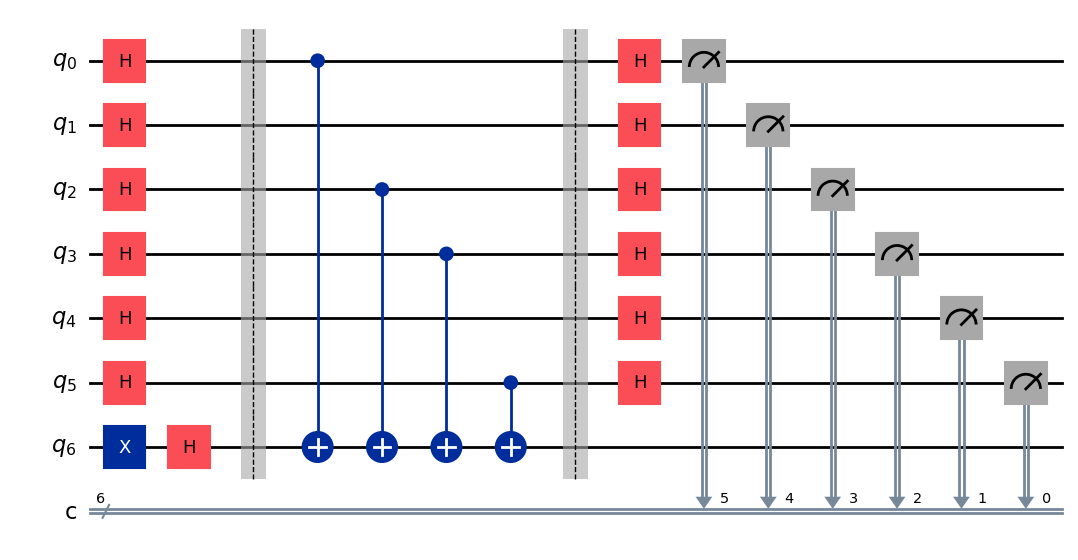

In [12]:
# Define the secret string
s_notebook = '101101'

print(f"Attempting to find the secret string s = {s_notebook}")

# Create the circuit
qc_notebook = bernstein_vazirani_circuit(s_notebook)

# Draw the circuit
print("Circuit diagram:")
# 'fold=-1' prevents the diagram from wrapping
qc_notebook.draw(output='mpl', fold=-1)



Now, we define a helper function to run the simulation on the `AerSimulator` and plot the results.

In [13]:
def run_bv_simulation(qc, shots=1024):
    """Simulates the circuit and plots the histogram."""
    sim = AerSimulator()
    tqc = transpile(qc, sim)

    print(f"Running simulation with {shots} shots...")
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()

    print("Simulation Results:", counts)

    # Plot the histogram
    fig = plot_histogram(counts, title="Bernstein-Vazirani Results")
    display(fig)

    # Find the most frequent result
    most_frequent = max(counts, key=counts.get)
    print(f"Most frequent measured bitstring: {most_frequent}")
    return most_frequent



### Step 5: Verify the Result

Finally, let's run the simulation and check if the measured output matches our secret $s$.

Running simulation with 1024 shots...
Simulation Results: {'101101': 1024}


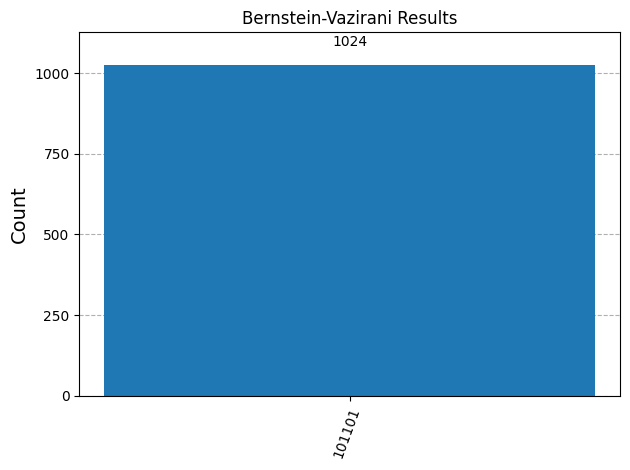

Most frequent measured bitstring: 101101

✅ Success! The measured string '101101' matches the secret '101101'.


In [14]:
# Run the simulation
measured_string = run_bv_simulation(qc_notebook)

# Check the result
if measured_string == s_notebook:
    print(f"\n✅ Success! The measured string '{measured_string}' matches the secret '{s_notebook}'.")
else:
    print(f"\n⚠️ Failure. The measured string '{measured_string}' does not match the secret '{s_notebook}'.")



As you can see, the histogram shows a 100% probability of measuring the secret string. The algorithm found $s$ in just **one shot** (plus measurement).